In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

from mockobservation_tools.galaxy_tools import (load_halo,
                                                load_sim,
                                                mask_sim_to_halo,
                                                get_mock_observation,
                                                )

from mockobservation_tools.general_tools import (mag_to_lum_SB
                                                )


%matplotlib inline


Missing firefly, obtain it at http://github.com/ageller/Firefly or pip install firefly.


# Creating Images used for Science


### Review tutorial 1 for alternative loading methods
### Review tutorial 2 for making images

Here we focus on making nice looking images 

Note the composite image itself is not for science, you can not proform measurements on it.\
You can adjust the parameters below to make the prettiest image


There are 4 output of get_mock_observation for return_type='mock_image':\
compositeimage, band_u, band_g, band_r\
compositeimage is the stacked colored image\
band_u, band_g, band_r are the same outputs as return_type='SB_lum' and can be used for science

Note if you do not need the compositeimage then use SB_lum as it take extra time to run the composite image

In [2]:
#Example using the m11c_res2100 and the 600 snap shot

sim = 'm11c_res2100' #defined only to ease defining directories  

snap_num = 600 #snapshot number

# path to the directory holding the simulation snapshot 
sim_path =  '/DFS-L/DATA/cosmo/grenache/aalazar/FIRE/GVB/'+str(sim)+'/output/hdf5/snapdir_'+str(snap_num)+'/'

# path to the directory holding the halo files for the simulation
halo_path = '/DFS-L/DATA/cosmo/grenache/aalazar/FIRE/GVB/'+str(sim)+'/halo/rockstar_dm/hdf5/'


In [3]:
star_snapdict, gas_snapdict = load_sim(sim_path,snap_num)

halo = load_halo(halo_path, snap_num, filetype='hdf5')


In [4]:
#For now you can use this FOV
FOV = 25

star_snapdict, gas_snapdict, halo = mask_sim_to_halo(star_snapdict=star_snapdict,
                                                     gas_snapdict=gas_snapdict, 
                                                     host_halo=halo, 
                                                     lim = True,
                                                     limvalue = FOV
                                                    )


For full reivew of get_mock_observation


    minden=57650, this is the minimium surface brightness in unit Lsun/kpc2
    dynrange=912.7983347788378, this is the dynamic range or Max Surface Brightness/Min Surface Brightness
    
    


In [5]:
compositeimage, band_u, band_g, band_r = get_mock_observation(star_snapdict, 
    gas_snapdict, 
    bands=[1,2,3], 
    FOV=FOV, 
    pixels=500, 
    view='xy', 
    return_type='mock_image')
# ignore divide by zero encountered in log warnings

Calculating L/M in Sloan u (BAND_ID=1,l=3551 A)
Calculating L/M in Sloan g (BAND_ID=2,l=4686 A)
Calculating L/M in Sloan r (BAND_ID=3,l=6165 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.15675338 0.09673077 0.07008224]
opacity in each band: [np.float64(1585.979156207648), np.float64(1154.4425319436855), np.float64(799.3864465256439)]
total gas mass: 0.03491722347875767
maxden ==  52622824.0 dynrange ==  912.7983347788378 minden ==  57650.0


/export/nfs0home/kleinca/miniconda3/envs/apenv/lib/python3.12/site-packages/firestudio/utils/stellar_utils/make_threeband_image.py:71: RuntimeWarning: divide by zero encountered in log
  r = np.log(r/minnorm) / np.log(maxnorm/minnorm)
/export/nfs0home/kleinca/miniconda3/envs/apenv/lib/python3.12/site-packages/firestudio/utils/stellar_utils/make_threeband_image.py:72: RuntimeWarning: divide by zero encountered in log
  g = np.log(g/minnorm) / np.log(maxnorm/minnorm)
/export/nfs0home/kleinca/miniconda3/envs/apenv/lib/python3.12/site-packages/firestudio/utils/stellar_utils/make_threeband_image.py:73: RuntimeWarning: divide by zero encountered in log
  b = np.log(b/minnorm) / np.log(maxnorm/minnorm)


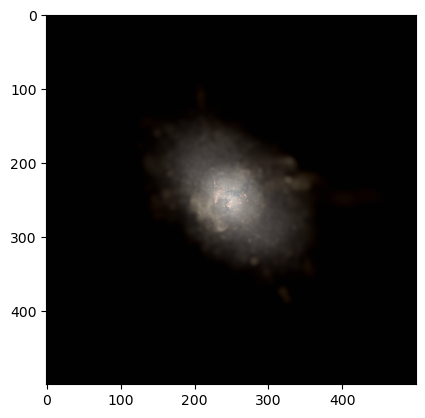

In [6]:
plt.imshow(compositeimage)

## Now lets play with minden and dynrange

In observations there is some limit to the luminosity we can see, what what does this look like if you can see all the light

We would do that by setting minden to a small number (greater than 0)


In [7]:
compositeimage, band_u, band_g, band_r = get_mock_observation(star_snapdict, 
    gas_snapdict, 
    bands=[1,2,3], 
    FOV=FOV, 
    pixels=500, 
    view='xy', 
    minden = 1,
    return_type='mock_image')
# ignore divide by zero encountered in log warnings

Calculating L/M in Sloan u (BAND_ID=1,l=3551 A)
Calculating L/M in Sloan g (BAND_ID=2,l=4686 A)
Calculating L/M in Sloan r (BAND_ID=3,l=6165 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.15675338 0.09673077 0.07008224]
opacity in each band: [np.float64(1585.979156207648), np.float64(1154.4425319436855), np.float64(799.3864465256439)]
total gas mass: 0.03491722347875767
maxden ==  912.7983347788378 dynrange ==  912.7983347788378 minden ==  1.0


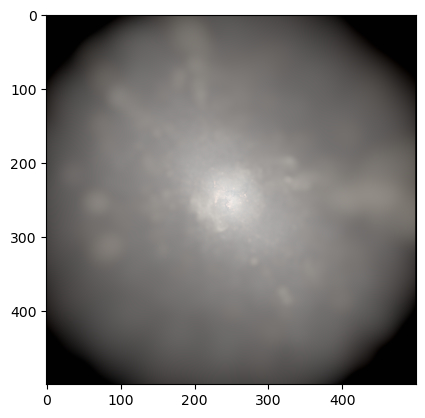

In [8]:
plt.imshow(compositeimage)

In [9]:
print('In general, minden ~ 1e5 is very resonable choice')
print('Alternatively you can calculate a min based on a given Surface brightness limit')

print(f'25 mag/arcsec^2: {mag_to_lum_SB(25,band=1)} Lsun/kpc2')
print(f'29 mag/arcsec^2: {mag_to_lum_SB(29,band=1)} Lsun/kpc2')
print(f'31 mag/arcsec^2: {mag_to_lum_SB(31,band=1)} Lsun/kpc2')
print(f'33 mag/arcsec^2: {mag_to_lum_SB(33,band=1)} Lsun/kpc2')

print('Set band to one of the bands you are using')



In general, minden ~ 1e5 is very resonable choice
Alternatively you can calculate a min based on a given Surface brightness limit
25 mag/arcsec^2: 21320628.35811653 Lsun/kpc2
29 mag/arcsec^2: 535549.9708401132 Lsun/kpc2
31 mag/arcsec^2: 84878.95030072438 Lsun/kpc2
33 mag/arcsec^2: 13452.407051486329 Lsun/kpc2
Set band to one of the bands you are using


In [10]:
compositeimage1, band_u, band_g, band_r = get_mock_observation(star_snapdict, 
    gas_snapdict, 
    bands=[1,2,3], 
    FOV=FOV, 
    pixels=500, 
    view='xy', 
    minden = mag_to_lum_SB(27,band=1),
    return_type='mock_image')
# ignore divide by zero encountered in log warnings

compositeimage2, band_u, band_g, band_r = get_mock_observation(star_snapdict, 
    gas_snapdict, 
    bands=[1,2,3], 
    FOV=FOV, 
    pixels=500, 
    view='xy', 
    minden = mag_to_lum_SB(29,band=1),
    return_type='mock_image')
# ignore divide by zero encountered in log warnings

compositeimage3, band_u, band_g, band_r = get_mock_observation(star_snapdict, 
    gas_snapdict, 
    bands=[1,2,3], 
    FOV=FOV, 
    pixels=500, 
    view='xy', 
    minden = mag_to_lum_SB(31,band=1),
    return_type='mock_image')
# ignore divide by zero encountered in log warnings



Calculating L/M in Sloan u (BAND_ID=1,l=3551 A)
Calculating L/M in Sloan g (BAND_ID=2,l=4686 A)
Calculating L/M in Sloan r (BAND_ID=3,l=6165 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.15675338 0.09673077 0.07008224]
opacity in each band: [np.float64(1585.979156207648), np.float64(1154.4425319436855), np.float64(799.3864465256439)]
total gas mass: 0.03491722347875767
maxden ==  3084429435.996234 dynrange ==  912.7983347788378 minden ==  3379091.8743772265
Calculating L/M in Sloan u (BAND_ID=1,l=3551 A)
Calculating L/M in Sloan g (BAND_ID=2,l=4686 A)
Calculating L/M in Sloan r (BAND_ID=3,l=6165 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.15675338 0.09673077 0.07008224]
opacity in each band: [np.float64(1585.979156207648), np.float64(1154.4425319436855), np.float64(799.3864465256439)]
total gas mass: 0.03491722347875767
maxden ==  488849121.5737105 dynrange ==  912.7983347788378 minden ==  535

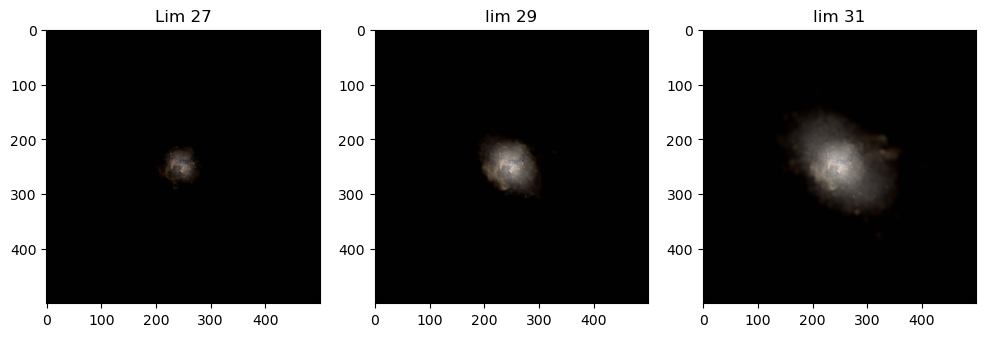

In [11]:

fig = plt.figure(figsize = (12, 4))    

ax = fig.add_subplot(1, 3, 1)  

plt.imshow(compositeimage1)
plt.title('Lim 27')

ax = fig.add_subplot(1, 3, 2)  

plt.imshow(compositeimage2)
plt.title('lim 29')

ax = fig.add_subplot(1, 3, 3)  

plt.imshow(compositeimage3)
plt.title('lim 31')


plt.show()

## We can also look at the dynamic range

The main issue that can arise from dynamic range is when it is too large an the brightest region begins to fade.

In [12]:
compositeimage1, band_u, band_g, band_r = get_mock_observation(star_snapdict, 
    gas_snapdict, 
    bands=[1,2,3], 
    FOV=FOV, 
    pixels=500, 
    view='xy', 
    minden = mag_to_lum_SB(31,band=1),
    dynrange = 1e1,
    return_type='mock_image')
# ignore divide by zero encountered in log warnings

compositeimage2, band_u, band_g, band_r = get_mock_observation(star_snapdict, 
    gas_snapdict, 
    bands=[1,2,3], 
    FOV=FOV, 
    pixels=500, 
    view='xy', 
    minden = mag_to_lum_SB(31,band=1),
    dynrange = 1e3,
    return_type='mock_image')
# ignore divide by zero encountered in log warnings

compositeimage3, band_u, band_g, band_r = get_mock_observation(star_snapdict, 
    gas_snapdict, 
    bands=[1,2,3], 
    FOV=FOV, 
    pixels=500, 
    view='xy', 
    minden = mag_to_lum_SB(31,band=1),   
    dynrange = 1e5,
    return_type='mock_image')
# ignore divide by zero encountered in log warnings



Calculating L/M in Sloan u (BAND_ID=1,l=3551 A)
Calculating L/M in Sloan g (BAND_ID=2,l=4686 A)
Calculating L/M in Sloan r (BAND_ID=3,l=6165 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.15675338 0.09673077 0.07008224]
opacity in each band: [np.float64(1585.979156207648), np.float64(1154.4425319436855), np.float64(799.3864465256439)]
total gas mass: 0.03491722347875767
maxden ==  848789.5030072437 dynrange ==  10.0 minden ==  84878.95030072438
Calculating L/M in Sloan u (BAND_ID=1,l=3551 A)
Calculating L/M in Sloan g (BAND_ID=2,l=4686 A)
Calculating L/M in Sloan r (BAND_ID=3,l=6165 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.15675338 0.09673077 0.07008224]
opacity in each band: [np.float64(1585.979156207648), np.float64(1154.4425319436855), np.float64(799.3864465256439)]
total gas mass: 0.03491722347875767
maxden ==  84878950.30072437 dynrange ==  1000.0 minden ==  84878.95030072438
Calculatin

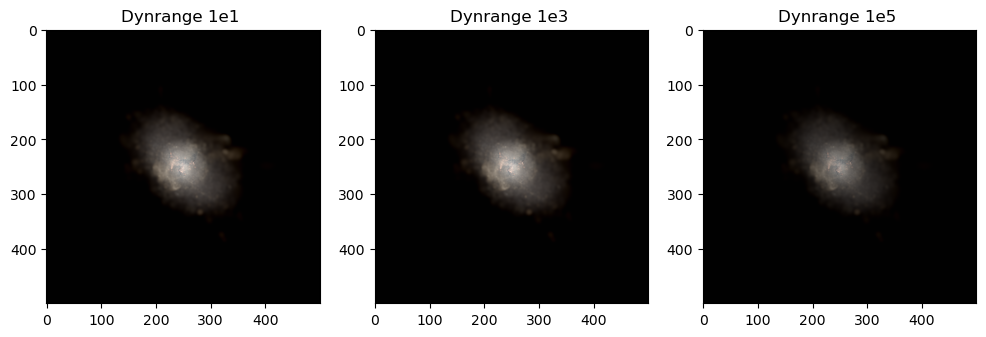

In [13]:
fig = plt.figure(figsize = (12, 4))    

ax = fig.add_subplot(1, 3, 1)  

plt.imshow(compositeimage1)
plt.title('Dynrange 1e1 ')

ax = fig.add_subplot(1, 3, 2)  

plt.imshow(compositeimage2)
plt.title('Dynrange 1e3 ')

ax = fig.add_subplot(1, 3, 3)  

plt.imshow(compositeimage3)
plt.title('Dynrange 1e5 ')


plt.show()

## Here are examples of other bands

In [14]:
compositeimage, band_U, band_V, band_J = get_mock_observation(star_snapdict, 
    gas_snapdict, 
    bands=[6, 8, 11],  #UVJ
    FOV=FOV, 
    pixels=500, 
    view='xy', 
    return_type='mock_image')
# ignore divide by zero encountered in log warnings

Calculating L/M in Johnsons U (BAND_ID=6,l=3600 A)
Calculating L/M in Johnsons V (BAND_ID=8,l=5556 A)
Calculating L/M in Cousins J (BAND_ID=11,l=12150 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.10267062 0.06661471 0.07826254]
opacity in each band: [np.float64(1562.8324586151327), np.float64(925.1062772049945), np.float64(261.4228922763493)]
total gas mass: 0.03491722347875767
maxden ==  52622824.0 dynrange ==  912.7983347788378 minden ==  57650.0


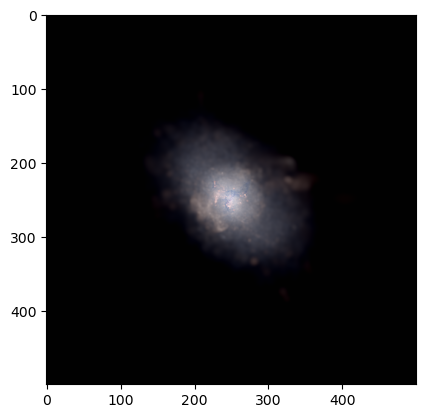

In [15]:
plt.imshow(compositeimage)
